In [ ]:
# Step 1: Import Libraries
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Step 2: Define Paths and Gather Filepaths
# Assuming you have unzipped the SOCOFing dataset and it resides in a folder named "SOCOFing/Real"
data_dir = 'SOCOFing/Real'  # Change this if your dataset folder is located elsewhere
file_paths = glob.glob(os.path.join(data_dir, '*.bmp'))
print(f"Found {len(file_paths)} images.")

# Step 3: Simulate Blood Group Labels
def simulate_blood_group(file_name):
    """
    This function extracts the finger type from the filename and returns a simulated blood group.
    Example filename: "101__M_Left_index_finger.bmp"
    """
    base_name = os.path.basename(file_name)
    parts = base_name.split('_')

    # Extract the finger information; here we assume the finger name is in the fourth part.
    # Adjust the index if your file naming is different.
    if len(parts) >= 4:
        finger = parts[3].lower()  # e.g., "index", "thumb", "middle", or "ring"
    else:
        return 'Unknown'

    # Simulated mapping (for demonstration purposes only)
    if 'index' in finger:
        return 'A+'
    elif 'thumb' in finger:
        return 'B+'
    elif 'middle' in finger:
        return 'O+'
    elif 'ring' in finger:
        return 'AB+'
    else:
        return 'Unknown'

# Create a DataFrame with file paths and simulated blood group labels
df = pd.DataFrame({'filepath': file_paths})
df['blood_group'] = df['filepath'].apply(simulate_blood_group)

# Remove any rows with 'Unknown' labels (if any)
df = df[df['blood_group'] != 'Unknown']
print("Sample data:")
print(df.head())

# Step 4: Create Image Data Generators for Training and Validation
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation and rescaling; using validation_split to reserve 20% for validation.
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col="filepath",
    y_col="blood_group",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col="filepath",
    y_col="blood_group",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True
)

# Step 5: Build a CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Step 6: Train the Model
epochs = 10  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Step 7: Visualize Training History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


TensorFlow version: 2.18.0
Found 0 images.
Sample data:
Empty DataFrame
Columns: [filepath, blood_group]
Index: []


KeyError: 'blood_group'

Found 500 images.

Sample filenames:
432__M_Left_thumb_finger.BMP
203__M_Left_index_finger.BMP
365__M_Left_ring_finger.BMP
418__F_Left_middle_finger.BMP
495__M_Left_thumb_finger.BMP

Label distribution:
blood_group
B+     101
A+      96
AB+     93
O+      93
Name: count, dtype: int64
Found 307 validated image filenames belonging to 4 classes.
Found 76 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.2097 - loss: 3.7904 - val_accuracy: 0.2500 - val_loss: 1.3865
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.2597 - loss: 1.3869 - val_accuracy: 0.2895 - val_loss: 1.3884
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.2684 - loss: 1.3867 - val_accuracy: 0.2237 - val_loss: 1.3989
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.2818 - loss: 1.3826 - val_accuracy: 0.2500 - val_loss: 1.3968
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.3220 - loss: 1.3653 - val_accuracy: 0.3026 - val_loss: 1.3719
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.2842 - loss: 1.3585 - val_accuracy: 0.1974 - val_loss: 1.3703
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.3162 - loss: 1.3307 - val_accuracy: 0.2105 - val_loss: 1.3524
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.2792 - loss: 1.3473 - val_accuracy: 0.2763 - val_loss:

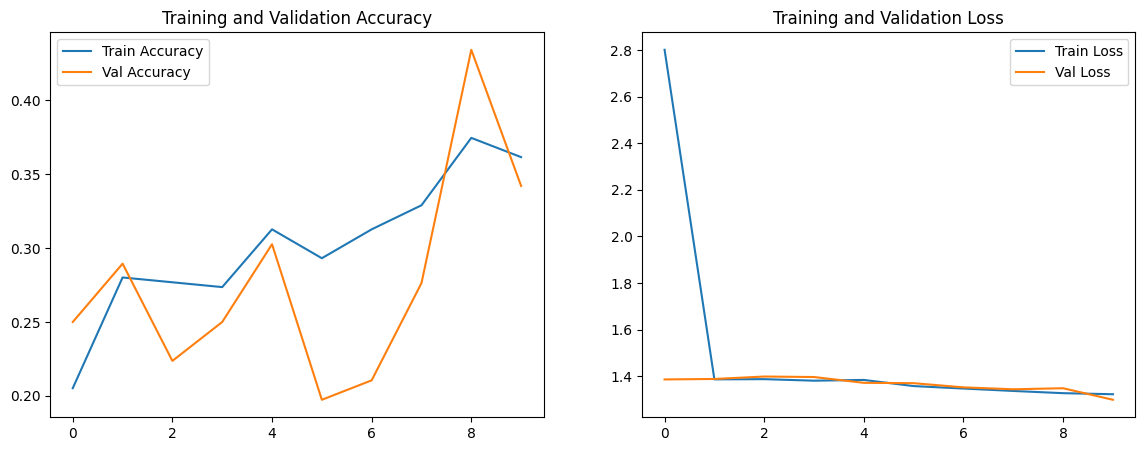

In [2]:
# Step 1: Import Libraries
import os
import glob
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 2: Unzip Dataset
zip_path = '/content/Sample_Real_500.zip'
extract_path = '/content/Sample_Real_500'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 3: Collect File Paths
data_dir = extract_path
file_paths = glob.glob(os.path.join(data_dir, '*.BMP'))  # or '*.bmp' if lowercase
print(f"Found {len(file_paths)} images.")

# Optional: Print sample filenames to debug structure
print("\nSample filenames:")
for f in file_paths[:5]:
    print(os.path.basename(f))

# Step 4: Simulate Blood Group Labels
def simulate_blood_group(file_path):
    """
    Simulate blood groups based on finger type in filename.
    """
    base_name = os.path.basename(file_path).lower()

    if 'index' in base_name:
        return 'A+'
    elif 'thumb' in base_name:
        return 'B+'
    elif 'middle' in base_name:
        return 'O+'
    elif 'ring' in base_name:
        return 'AB+'
    else:
        return 'Unknown'

# Step 5: Create DataFrame with Simulated Labels
df = pd.DataFrame({'filepath': file_paths})
df['blood_group'] = df['filepath'].apply(simulate_blood_group)

# Filter valid rows
df = df[df['blood_group'] != 'Unknown']
print("\nLabel distribution:")
print(df['blood_group'].value_counts())

# Step 6: Prepare Image Data Generators
img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col="filepath",
    y_col="blood_group",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col="filepath",
    y_col="blood_group",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True
)

# Step 7: Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Step 8: Train Model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

# Step 9: Visualize Accuracy & Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
